<center>

# Курс "Основы Python для анализа данных"

## Артамонов Игорь Михайлович
## Факультет "Прикладная математика" МАИ

### Практическое занятие № 1. numpy
</center>


## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline

In [4]:
import os
import skimage
import skimage.io
import skimage.transform
import skimage.color

In [63]:
PATH = 'pics'
image = skimage.io.imread(os.path.join(PATH,'The Abduction of Europa.jpg'))
bad_image = skimage.io.imread(os.path.join(PATH,'The Abduction of Europa-BAD.jpg'))
image_view = image[:bad_image.shape[0],:bad_image.shape[1],:]
image_view.shape

(799, 1024, 3)

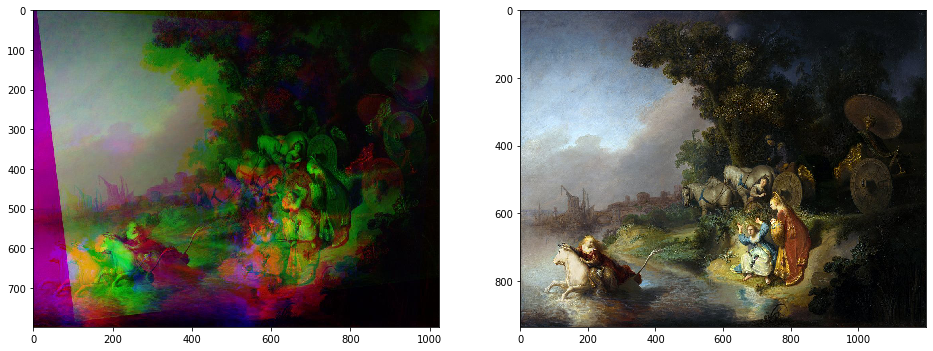

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 40))
ax[0].imshow(bad_image);
ax[1].imshow(image);

(936, 1200, 3)


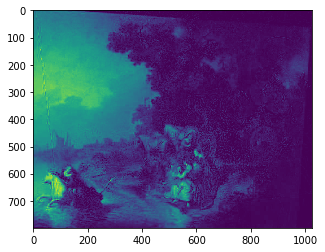

In [98]:
# Исследуйте свойства объекта bad_image
print(image.shape)
plt.imshow(bad_image[:, :, 2])

## Вопрос 1

* Тип данных, в которые считался файл изображения<br>
* Размер файла изображения<br>
* Размерность данных<br>
* Тип значений данных<br>

In [58]:
image = skimage.img_as_float(bad_image)

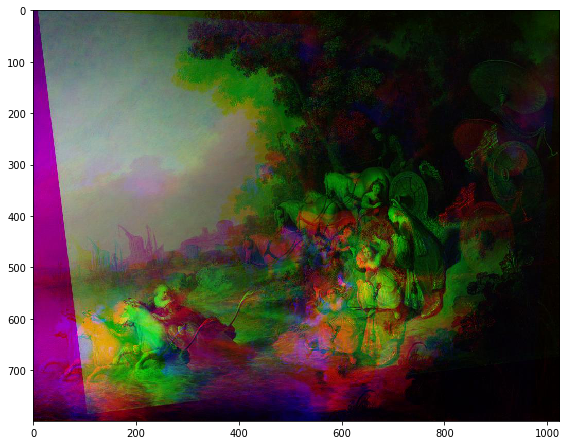

In [59]:
fig = plt.figure(num=None, figsize=(8, 10))
skimage.io.imshow(bad_image);

### Вопрос 2
Какой слой Вы возьмете за основу и почему?

In [ ]:
# Ваш код для определения

In [103]:
alpha = np.arctan(100 / 800)

In [73]:
print(np.pi / 6)

0.5235987755982988


### Возможно следующее линейное преобразование двумерной матрицы:

$$
X = a_0 * x - b_0 * y + a_1 = x * \cos(rotation) - y * \sin(rotation) + a1 \\
Y = b_0 * x + a_0 * y + b_1 = x * \sin(rotation) + y * \cos(rotation) + b1
$$

где матрица преобразования:
$$
\begin{bmatrix}
    a_{0}  & b_{0} & a_{1} \\
    b_{0}  & a_{0} & b_{1} \\
    0      & 0     & 1
\end{bmatrix}
$$
а $rotation$ - угол поворота против часовой стрелки

In [128]:
# Ваш код
def shift_and_rotate(shift, angle):
    """
    Поворачивает матрицу на величину сдвига shift и угол rotate
    """
    return np.array([[np.cos(angle), -np.sin(angle), shift[0]],
                     [np.sin(angle), np.cos(angle), shift[1]],
                     [0, 0, 1]])



t = shift_and_rotate([0, 0], np.pi / 6)
print(t)

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]


In [95]:
# Ваш код

def mse(image1, image2):
    diff = np.square(image1 - image2)
    return np.mean(diff, axis=(0, 1))

mse(image_view, bad_image)

array([97.76372932, 98.57304785, 98.61383981])

-0.18615438234591086


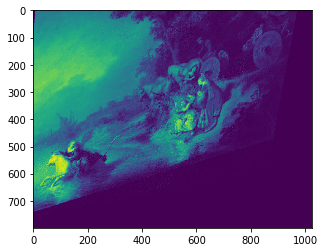

In [131]:
# Ваш код
# В результате должно получиться изображение good_image, максимально близкое к оригиналу

def apply_matrix(x, matr):
    result = np.zeros(x.shape)
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            idx = np.array([i, j, 1]) @ matr
            idx = idx.astype(np.int)
            
            if 0 <= idx[0] < result.shape[0] and 0 <= idx[1] < result.shape[1]:
                result[idx[0], idx[1]] = x[i, j]
    return result

def minimize_angle(bad, good, target, delta):
    values = []
    angles = np.arange(target - delta, target + delta, 0.1)
    
    print(angles)
    
    for i in range(angles.shape[0]):
        new = apply_matrix(bad, shift_and_rotate([0, 0], angles[i]))
        values.append(mse(new, good))
    
    print(np.argmin(values))
    
    return angles[np.argmin(values)]

#min_alpha1 = minimize_angle(image_view, bad_image[:,:,1], -alpha, np.pi / 12)
print(min_alpha1)
#layer_fixed1 = apply_matrix(bad_image[:,:,1], shift_and_rotate([0, 0], min_alpha1))
plt.imshow(layer_fixed1)

[-0.02359878  0.07640122  0.17640122  0.27640122  0.37640122  0.47640122
  0.57640122  0.67640122  0.77640122  0.87640122  0.97640122]
3
0.27640122440170123


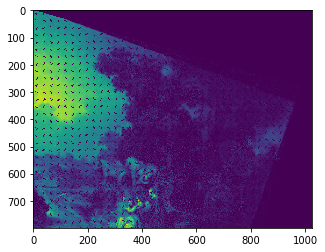

In [137]:
min_alpha2 = minimize_angle(image_view[:,:,2], bad_image[:,:,2], 0.5, np.pi / 6)
print(min_alpha2)
layer_fixed2 = apply_matrix(bad_image[:,:,2], shift_and_rotate([0, 0], min_alpha2))
plt.imshow(layer_fixed2)

In [ ]:
fig = plt.figure(num=None, figsize=(10, 12))
skimage.io.imshow(good_image);

### Вопрос 3:
Каковы значения (градусах и пикселях) для:
* Слой 0. Угол поворота $\alpha_0$, сдвиг $y_0$, сдвиг $x_0$
* Слой 1. Угол поворота $\alpha_1$, сдвиг $y_1$, сдвиг $x_1$
* Слой 2. Угол поворота$\alpha_2$, сдвиг $y_2$, сдвиг $x_2$

### Вопрос 4:
* Какой слой отвечает за какой цвет?
* Как Вы это определили?

### Вопрос 5:
* Можно ли было лучше восстановить изображение?
* Если да, то как?
* Если нет, то почему?